# Analysis on IPL dataset - part 2

(Based on IPL matches and deliveries dataset)


<a>https://www.kaggle.com/nowke9/ipldata#matches.csv</a>


<a>https://www.kaggle.com/nowke9/ipldata#deliveries.csv<a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from google.colab import files

In [23]:
df = pd.read_csv('/content/matches.csv')
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [25]:
df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [26]:
df['team1'].nunique()

14

In [27]:
df[df['winner'].isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [31]:
df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [32]:
# Q1 : Find the name of the player who won max number of man of the matches award in the period of 2010 and 2015 while plating in Mumbai [Easy]
df[(df['season']>=2010) & (df['season']<=2015) & (df['city']=='Mumbai')]['player_of_match'].value_counts().sort_values(ascending=False).head(1)

KA Pollard    6
Name: player_of_match, dtype: int64

In [33]:
# Q2 : Find the team who has won most number of matches with victory margin > 50 [Easy]
df[df['win_by_runs']>50]['winner'].value_counts().sort_values(ascending=False).head(1)

Chennai Super Kings    11
Name: winner, dtype: int64

In [0]:
# Q3 : Write a function which will take 2 inputs, team 1 and team 2 and their record against each other

# For example if team1->KKR and team2->CSK

# The output should be like KKR 2(matches won by KKR) and CSK 5(matches won by CSK)[Medium]

def show_rec(team1,team2):
    
    name={
            "MI" : "Mumbai Indians",
            "CSK" : "Chennai Super Kings",            
            "KKR" : "Kolkata Knight Riders",          
            "RCB" : "Royal Challengers Bangalore",
            "KXIP" : "Kings XI Punjab",               
            "RR" : "Rajasthan Royals",               
            "DD" : "Delhi Daredevils",               
            "SH" : "Sunrisers Hyderabad",            
            "DC" : "Deccan Chargers",                
            "GL" : "Gujarat Lions",                  
            "PW" : "Pune Warriors",                  
            "RPS" : "Rising Pune Supergiant",         
            "KTK" : "Kochi Tuskers Kerala",            
            "RPSS" : "Rising Pune Supergiants",         
            }
    team1=name.get(team1.upper(),team1)
    team2=name.get(team2.upper(),team2)
    result=df[( (df['team1']==team1) & (df['team2']==team2) ) | ( (df['team1']==team2) & (df['team2']==team1) )]
    team1_wins=result[result['winner']==team1].shape[0]
    team2_wins=result[result['winner']==team2].shape[0]
    draws=result[result['result']=='tie'].shape[0]
    no_res=result[result['result']=='no result'].shape[0]
    
    
    return(pd.DataFrame({"Team": [team1,team2],"Wins": [team1_wins,team2_wins],"Draws": draws,"No_Results": no_res}))

In [35]:
show_rec('Delhi Daredevils','Royal Challengers Bangalore')

,Team,Wins,Draws,No_Results
0,Delhi Daredevils,6,1,1
1,Royal Challengers Bangalore,12,1,1


In [36]:
show_rec('dd','rcb')

,Team,Wins,Draws,No_Results
0,Delhi Daredevils,6,1,1
1,Royal Challengers Bangalore,12,1,1


In [37]:
show_rec('RR','KKR')

,Team,Wins,Draws,No_Results
0,Rajasthan Royals,9,2,0
1,Kolkata Knight Riders,6,2,0


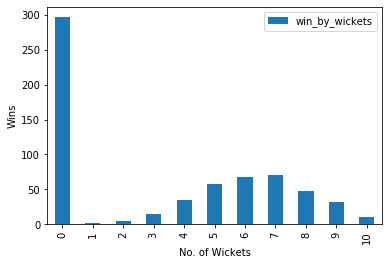

In [38]:
# Q4 : Plot a bar graph on win_by_wickets col. [Easy]
x=df['win_by_wickets'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('No. of Wickets')
plt.ylabel('Wins')
plt.legend()
plt.show()

In [0]:
# Q5 : Write a function which will accept a team name as input and will return it's win percentage after winning the toss[Difficult] 
def win_percent(team):
    
    name={
            "MI" : "Mumbai Indians",
            "CSK" : "Chennai Super Kings",            
            "KKR" : "Kolkata Knight Riders",          
            "RCB" : "Royal Challengers Bangalore",
            "KXIP" : "Kings XI Punjab",               
            "RR" : "Rajasthan Royals",               
            "DD" : "Delhi Daredevils",               
            "SH" : "Sunrisers Hyderabad",            
            "DC" : "Deccan Chargers",                
            "GL" : "Gujarat Lions",                  
            "PW" : "Pune Warriors",                  
            "RPS" : "Rising Pune Supergiant",         
            "KTK" : "Kochi Tuskers Kerala",            
            "RPSS" : "Rising Pune Supergiants",         
            }
    team=name.get(team.upper(),team)
    
    toss_wins=df[df['toss_winner']==team].shape[0]
    wins=df[(df['toss_winner']==team) & (df['winner']==team)].shape[0]
    return((wins/toss_wins)*100)

In [40]:
win_percent('kxip')

41.17647058823529